In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


## Simple Linear Regression

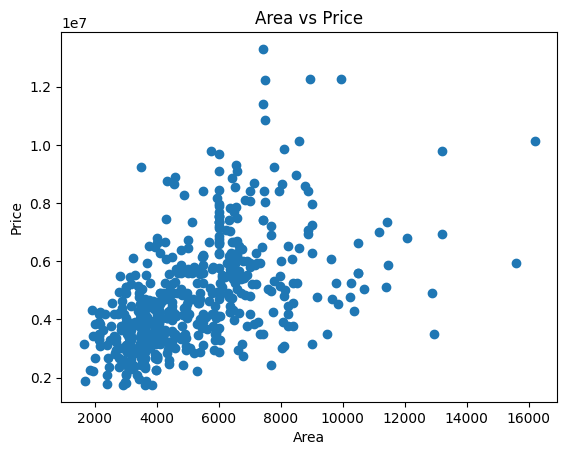

In [2]:
df = pd.read_csv('/home/ankurghoshal/Desktop/Dataset/Housing.csv')

round(df,2)

feaure = df['area']

plt.scatter(df['area'], df['price'])
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [3]:
x = df['area']
x = x / 100
x1 = x.values.reshape(-1, 1)

y = df['price']
y = y / 1000000

ones_column = np.ones((x1.shape[0], 1))
A = np.hstack((x1,ones_column))

A_t = A.T
A_t_A = np.dot(A_t, A)
A_t_A_inv = np.linalg.inv(A_t_A)
A_t_y = np.dot(A_t, y)
w = np.dot(A_t_A_inv, A_t_y)
print(w[0], w[1])
x1.shape

0.04619748942727842 2.387308482396427


(545, 1)

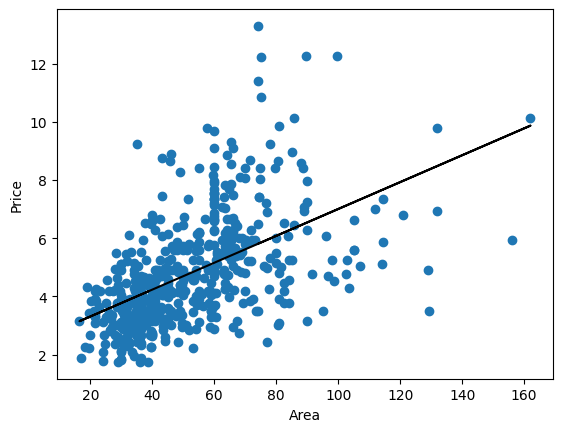

In [5]:
plt.scatter(x1, y)
plt.plot(x1, w[0]*x1 + w[1], color='black')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [6]:
X = x1
Y = y

model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)
print(f"Slope (Coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Slope (Coefficient): 0.05
Intercept: 2.39


In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Multiple Linear Regression

In [4]:
df_encoded = pd.get_dummies(df, columns= ['furnishingstatus'])
# df_encoded
df_new = df_encoded.rename(columns={'furnishingstatus_furnished':'furnished','furnishingstatus_semi-furnished':'semi-furnished','furnishingstatus_unfurnished':'unfurnished' })
# df_new


mapping = {'yes': 1, 'no': 0}

df_new['mainroad'] = df_new['mainroad'].str.lower().map(mapping)
df_new['guestroom'] = df_new['guestroom'].str.lower().map(mapping)
df_new['basement'] = df_new['basement'].str.lower().map(mapping)
df_new['hotwaterheating'] = df_new['hotwaterheating'].str.lower().map(mapping)
df_new['airconditioning'] = df_new['airconditioning'].str.lower().map(mapping)
df_new['prefarea'] = df_new['prefarea'].str.lower().map(mapping)
df_new['furnished'] = df_new['furnished'].astype(int)
df_new['semi-furnished'] = df_new['semi-furnished'].astype(int)
df_new['unfurnished'] = df_new['unfurnished'].astype(int)
df_new['price'] = df_new['price']/1000000
df_new['area'] = df_new['area']/1000

df_new


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13.30000,7.42,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12.25000,8.96,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12.25000,9.96,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12.21500,7.50,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11.41000,7.42,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3.00,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1.76715,2.40,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1.75000,3.62,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1.75000,2.91,3,1,1,0,0,0,0,0,0,0,1,0,0


In [5]:
df_np = df_new.to_numpy()

X_train = df_np[:430,1:]
Y_train = df_np[:430,:1]

ones_column_1 = np.ones((X_train.shape[0], 1))
A1 = np.hstack((X_train,ones_column_1))

y1 = Y_train


A1_t = A1.T
A1_t_A1 = np.dot(A1_t, A1)
A1_t_A1_inv = np.linalg.inv(A1_t_A1)
A1_t_y1 = np.dot(A1_t, y1)
w1 = np.dot(A1_t_A1_inv, A1_t_y1)

w1.shape

(15, 1)

In [10]:
df_bias = df_new.copy()
df_bias['bias'] = 1

column_to_exclude = 'price'
columns_to_use = [col for col in df_bias if col != column_to_exclude]

calculated_values = (df_bias[columns_to_use] * w2).sum(axis=1)

df_bias['predicted_price'] = calculated_values

df_bias.head(100)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,bias,predicted_price
0,13.300,7.42,4,2,3,1,0,0,0,1,2,1,1,0,0,1,14.122219
1,12.250,8.96,4,4,4,1,0,0,0,1,3,0,1,0,0,1,16.072281
2,12.250,9.96,3,2,2,1,0,1,0,0,2,1,0,1,0,1,11.540798
3,12.215,7.50,4,2,2,1,0,1,0,1,3,1,1,0,0,1,13.194012
4,11.410,7.42,4,1,2,1,1,1,0,1,2,0,1,0,0,1,11.586202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.300,4.10,3,2,3,1,0,0,0,1,2,0,0,1,0,1,7.159945
96,6.300,9.00,3,1,1,1,0,1,0,0,1,1,1,0,0,1,13.372851
97,6.300,6.40,3,1,1,1,1,1,0,1,1,1,0,1,0,1,7.461344
98,6.293,6.60,3,2,3,1,0,0,0,1,0,1,0,0,1,1,4.229377


### Mean squared error 

In [13]:
X_test = df_np[430:,1:]
Y_test = df_np[430:,:1]
n2 = len(X_test)

ones_column_2 = np.ones((X_test.shape[0],1))
A2 = np.hstack((X_test,ones_column_2))

y_pred = np.dot(A2,w1)
mse2 = 1/(2*n2)*sum((y_pred - Y_test)**2)

mse2


array([7.34628669])